In [86]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import Counter

In [87]:
df =  pd.read_csv("titanic/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.loc[df["Age"].isnull(),'Age'] = np.round(df["Age"].mean())
df.loc[df["Pclass"].isnull(),"Pclass"] = np.round(df["Pclass"].mean())
df.loc[df["Survived"].isnull(),"Survived"] = np.round(df["Survived"].mean())
df.loc[df["SibSp"].isnull(),"SibSp"] = np.round(df["SibSp"].mean())
df.loc[df["Parch"].isnull(),"Parch"] = np.round(df["Parch"].mean())
df.loc[df["Fare"].isnull(),"Fare"] = np.round(df["Fare"].mean())

for index,value in df["Embarked"].items():
    if pd.isnull(value):
        x = rd.randint(0,1)
        if(x == 1):
            df.loc[index,"Embarked"] = "S"
        else:
            df.loc[index,"Embarked"] = "C"



In [89]:
dfTrain = pd.read_csv("titanic/test.csv")
dfTrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
dfTrain.loc[df["Age"].isnull(),'Age'] = np.round(dfTrain["Age"].mean())
dfTrain.loc[df["Pclass"].isnull(),"Pclass"] = np.round(dfTrain["Pclass"].mean())
dfTrain.loc[df["SibSp"].isnull(),"SibSp"] = np.round(dfTrain["SibSp"].mean())
dfTrain.loc[df["Parch"].isnull(),"Parch"] = np.round(dfTrain["Parch"].mean())
dfTrain.loc[df["Fare"].isnull(),"Fare"] = np.round(dfTrain["Fare"].mean())

for index,value in dfTrain["Embarked"].items():
    if pd.isnull(value):
        xTrain = rd.randint(0,1)
        if(x == 1):
            dfTrain.loc[index,"Embarked"] = "S"
        else:
            dfTrain.loc[index,"Embarked"] = "C"



In [91]:
features =  ['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']
sepat = int(np.floor(0.9*len(df)))
df.sample(frac=1,random_state=217)
X_train = df[features][:sepat]
y_train = df["Survived"][:sepat].values
X_test = df[features][sepat:]
y_test = df["Survived"][sepat:].values




In [92]:
p = df.loc[df['Survived']==1,"Survived"].count()/df['Survived'].count()
print(p)

0.3838383838383838


C:\Users\thera\AppData\Local\Temp\ipykernel_13592\3355778660.py:2: RuntimeWarning: divide by zero encountered in log
  return -x*np.log(x) -(1-x)*np.log(1-x)
C:\Users\thera\AppData\Local\Temp\ipykernel_13592\3355778660.py:2: RuntimeWarning: invalid value encountered in multiply
  return -x*np.log(x) -(1-x)*np.log(1-x)


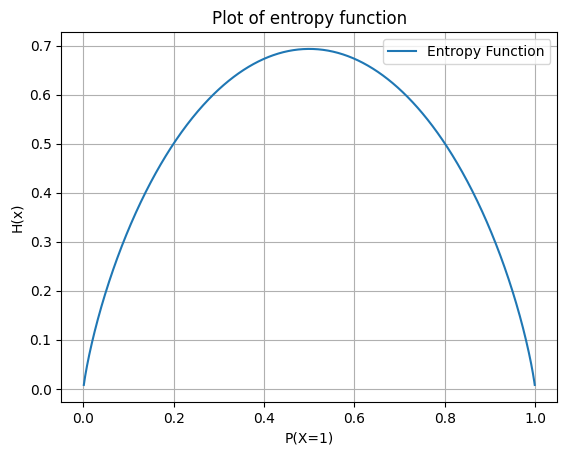

In [93]:
def hx(x):
            return -x*np.log(x) -(1-x)*np.log(1-x)

x = np.linspace(0,1,1000)
y = hx(x)

plt.plot(x,y,label= "Entropy Function")
plt.xlabel("P(X=1)")
plt.ylabel("H(x)")
plt.title("Plot of entropy function")
plt.legend()
plt.grid(True)
plt.show()


**Entropy Gain**


In [94]:
n_sur = df.loc[df['Survived'] == 1, "Survived"].count()
n_per = df["Survived"].count()
p0 = n_sur / n_per

# Criterion 1 : Age
n_sur_age1 = df.loc[(df["Survived"] == 1) & (df["Age"] <= 18), "Survived"].count()
n_per_age1 = df.loc[df["Age"] <= 18].count()["Age"]
p1 = n_sur_age1 / n_per_age1

n_sur_age2 = df.loc[(df["Survived"] == 1) & (df["Age"] > 18), "Survived"].count()
n_per_age2 = df.loc[df["Age"] > 18].count()["Age"]
p2 = n_sur_age2 / n_per_age2

h0 = hx(p0)
h1 = hx(p1)
h2 = hx(p2)

IG = h0 - (n_per_age1 / n_per) * h1 - (n_per_age2 / n_per) * h2
print(IG)

0.0054786574220077044


**Defing above functions in a sytematic way** -- 
1> Entropy Function
2> Information Gain (IG)

In [95]:
def entropy(p):
    if(p ==1):
        return 0
    elif (p==0):
        return 0
    else:
        return -p*np.log(p) -(1-p)*np.log(1-p)
    
def information_gain(lc, rc):
    parent = lc + rc
    len_parent = len(parent)
    len_lc = len(lc)
    len_rc = len(rc)
    
    p_parent = parent.count(1) / len_parent if len_parent > 0 else 0
    p_lc = lc.count(1) / len_lc if len_lc > 0 else 0
    p_rc = rc.count(1) / len_rc if len_rc > 0 else 0
    
    e_p = entropy(p_parent)
    e_lc = entropy(p_lc)
    e_rc = entropy(p_rc)
    
    ig = e_p
    if len_parent > 0:
        ig -= (len_lc / len_parent) * e_lc if len_lc > 0 else 0
        ig -= (len_rc / len_parent) * e_rc if len_rc > 0 else 0
    
    return ig



**Making Bootstrapped tree**

In [96]:
def booty_booty(X_train, y_train):
    n_samples = X_train.shape[0]
    booty_index = np.random.choice(n_samples, n_samples, replace=True)
    oob_index = [i for i in range(n_samples) if i not in booty_index]
    
    X_booty = X_train.iloc[booty_index].values
    y_booty = y_train[booty_index]
    X_oob = X_train.iloc[oob_index].values
    y_oob = y_train[oob_index]
    
    return X_booty, y_booty, X_oob, y_oob

# To find accuracy using OOB(Out-of-Bag Observations) samples 
def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

**Now finding data ko katna kaab h** (That's  what she used to do)

In [97]:
def find_spilt(X_booty,y_booty, max_features):
    feature_ls = list()
    num_fea = len(X_booty[0])

    while len(feature_ls) <= max_features:
        feature_idx = rd.sample(range(num_fea),1)

        if feature_idx not in feature_ls:
            feature_ls.extend(feature_idx)
        best_gain = -999
        node =  None
        for feature_idx in feature_ls:
            for  sp in X_booty[:,feature_idx]:
                lc = {"X_booty": [] ,
                      "y_booty": []}
                rc = {"X_booty": [],
                      "y_booty": []}

                if type(sp) in [int,float]:
                    for i,row in enumerate(X_booty):
                        value = row[feature_idx]        
                        # print(sp)
                        # print(value)                        
                        if value<=sp:
                            lc["X_booty"].append(row)
                            lc["y_booty"].append(y_booty[i])
                        else:
                            rc["X_booty"].append(row)
                            rc["y_booty"].append(y_booty[i])
                else:
                    for i,row in enumerate(X_booty[:feature_idx]):
                        value = row[feature_idx]
                        # print(sp)
                        # print(value)
                        if value == sp:
                            lc["X_booty"].append(row)
                            lc["y_booty"].append(y_booty[i])                            
                        else:
                            rc["X_booty"].append(row)
                            rc["y_booty"].append(y_booty[i])                                    
                gain = information_gain(lc["y_booty"],rc["y_booty"])
                if gain > best_gain:
                    best_gain = gain
                    lc["X_booty"] = np.array(lc["X_booty"])
                    rc["X_booty"] = np.array(rc["X_booty"])
                    node = {
                        "Info_gain" : best_gain,
                        "lc" : lc,
                        "rc" : rc,
                        "sp" : sp,
                        "feature_idx" :feature_idx
                    }
        return node

In [98]:
import cProfile

def terminal_node(node):
    y_booty = node["y_booty"]
    # Use Counter to find the most common element
    pred = Counter(y_booty).most_common(1)[0][0] if  y_booty else None # Get the most frequent element
    if pred == None:
        # print(pred)
        
    # else:
        print(y_booty)
        print("Prediction calculation error")    
    return pred

def split(node,max_features,min_sample_split,max_depth,depth):
    lc = node["lc"]
    rc = node["rc"]

    del(node["lc"])
    del(node["rc"])
    # print("Truth Value: " + str(len(lc["y_booty"]) == 0 or len(rc["y_booty"]) == 0))

    if len(lc["y_booty"]) == 0 or len(rc["y_booty"]) == 0:
        # print("Abba Jabba")
        empty_child = {'y_booty' : lc["y_booty"]+rc["y_booty"]}
        node["ls"] = terminal_node(empty_child)
        node["rs"] = terminal_node(empty_child)
        return 
    if depth >= max_depth:
        node["ls"] = terminal_node(lc)
        node["rs"] = terminal_node(rc)
        return node

    if len(lc["X_booty"]) < min_sample_split:
        node["ls"] = node["rs"] = terminal_node(lc)
    else:
        node["ls"] = find_spilt(lc["X_booty"],lc["y_booty"],max_features)
        split(node["ls"],max_features,min_sample_split,max_depth,depth+1)
    
    if len(rc["X_booty"]) < min_sample_split:
        node["rs"] = node["ls"] = terminal_node(lc)
    else:
        node["rs"] = find_spilt(rc["X_booty"],rc["y_booty"],max_features)
        split(node["rs"],max_features,min_sample_split,max_depth,depth+1)
    pass    


In [99]:
def build_tree(X_booty,y_booty,max_depth,min_sample_spilt,max_features):
    root_node = find_spilt(X_booty,y_booty,max_features)
    split(root_node,max_features,min_sample_spilt,max_depth,1)
    return root_node

def random_forest(X_train,y_train,epoch,max_features,max_depth,min_sample_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(epoch):
        X_booty,y_booty,X_oob,y_oob = booty_booty(X_train,y_train)
        tree = build_tree(X_booty,y_booty,max_features,max_depth,min_sample_split)
        tree_ls.append(tree)
        oob_error =  oob_score(tree,X_oob,y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls
def predict_tree(tree, X_test):
    feature_idx = tree['feature_idx']

    if X_test[feature_idx] <= tree['sp']:
        if type(tree['ls']) == dict:
            return predict_tree(tree['ls'], X_test)
        else:
            value = tree['ls']
            return value
    else:
        if type(tree['rs']) == dict:
            return predict_tree(tree['rs'], X_test)
        else:
            return tree['rs']

In [100]:
def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)



In [101]:
import time
n_estimators = 100
max_features = 3
max_depth = 10
min_samples_split = 2

# Epoch herein is the  number of trees
start = time.time()
model = random_forest(X_train, y_train, epoch=400, max_features=4, max_depth=15, min_sample_split=5)
end = time.time()
cProfile.run('random_forest(X_train, y_train, epoch=100, max_features=3, max_depth=10, min_sample_split=2)')

print("Training time: " + str(end-start))

OOB estimate: 0.41
         77350001 function calls (77331409 primitive calls) in 57.953 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      206   35.832    0.174   55.262    0.268 1228633366.py:1(find_spilt)
   205/53    0.004    0.000   18.434    0.348 2614498336.py:15(split)
      258    0.001    0.000    0.009    0.000 2614498336.py:3(terminal_node)
       54    0.003    0.000   53.435    0.990 27576229.py:1(build_tree)
32835/15586    0.020    0.000    0.020    0.000 27576229.py:17(predict_tree)
        1    0.000    0.000    6.327    6.327 27576229.py:6(random_forest)
       54    0.175    0.003    0.235    0.004 3826223859.py:1(booty_booty)
       53    0.010    0.000    0.030    0.001 3826223859.py:14(oob_score)
   271314    0.905    0.000    0.905    0.000 3989520665.py:1(entropy)
    90438    0.435    0.000    4.441    0.000 3989520665.py:9(information_gain)
      206    0.000    0.000    0.000    0.000 <frozen _

KeyboardInterrupt: 

In [ ]:
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: ")
print(acc)


Testing accuracy: 
0.7444444444444445
